In [ ]:
1Q .import dataset and display first 5 rowsim

In [8]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
top_five=df.head()
print(top_five)

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [ ]:
2. Check column data types

In [4]:
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [ ]:
# 3. Check the shape of the Data Frame (rows, columns)

In [13]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
rows=df.shape[0];
columns=df.shape[1]
print("rows= ",rows)
print("columns =",columns)

rows=  200
columns = 2


In [ ]:
# 4. Look at summary statistics

In [15]:
print("summary statistics :")
print(df.describe())

summary statistics :
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


In [ ]:
# 5. Visualize the relationship between the features and the dependent variable
using scatterplots

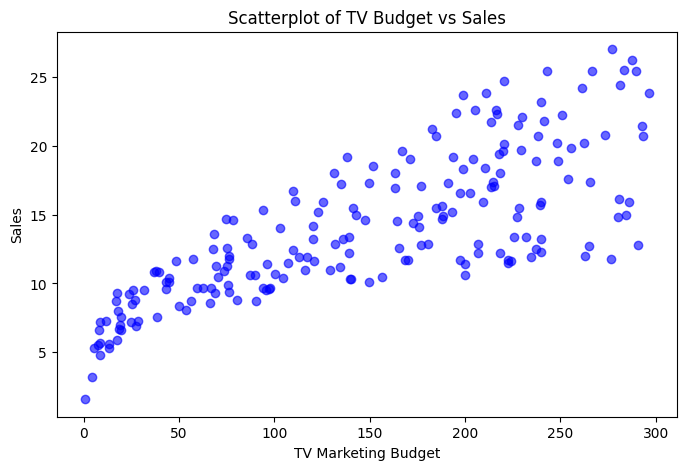

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.6)
plt.title("Scatterplot of TV Budget vs Sales")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.show()


In [ ]:
# 6. Prepare X (feature variables) and y (response variable)

In [9]:
X=df[['TV']]
Y=df['Sales']
print(X)
print(Y)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [ ]:
7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,Y_train, X_test, Y_test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

print("\nData split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)



Data split:
X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [ ]:
8. Print the shape of train data and test data

In [17]:
import pandas as pd
import matplotlib as plt
import numpy as np
print("\nData split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)



Data split:
X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [ ]:
9. Perform Linear Regression (on train data) without using any library and
print the coefficients values

In [40]:
import numpy as np
x_train_np=X_train.values.flatten()
y_train_np=Y_train.values
mean_x=np.mean(x_train_np)
mean_y=np.mean(y_train_np)
numerator=np.sum((x_train_np-mean_x)*(y_train_np-mean_y))
denominator=np.sum((x_train_np-mean_x)**2)
b1=numerator /denominator
b0=mean_y-b1*mean_x
print("slope :",b1)
print("intercept",b0)

slope : 0.04640780212815278
intercept 7.2394598307511355


In [ ]:
 # 10. Create the Model Using the Calculated Coefficients and Make Predictions on the Testing Set

In [41]:
# Make predictions on X_test manually
X_test_np = X_test.values.flatten()
y_pred_manual = b0 + b1 * X_test_np

print("\nManual Predictions on Testing Set:")
print(y_pred_manual[:5])  # display first 5 predictions



Manual Predictions on Testing Set:
[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


In [ ]:
# 11.Perform Linear Regression using library(sklearn)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [43]:
# 12 print the Intercept and coefficients
print("intercept :",lr.intercept_)
print("co-efficient :",lr.coef_[0])


intercept : 7.239459830751138
co-efficient : 0.046407802128152764


In [14]:
# 13.Make predictions on the testing set - y_pred

y_pred = lr.predict(X_test)
print("\nscikit-learn Predictions on Testing Set:")
print(y_pred[:5])


scikit-learn Predictions on Testing Set:
[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


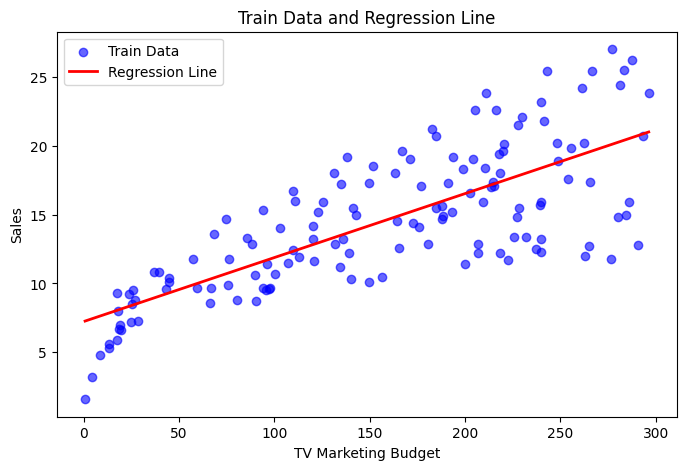

In [48]:
# 14. plot train data and model
plt.figure(figsize=(8, 5))
plt.scatter(X_train, Y_train, color='blue', alpha=0.6, label="Train Data")
# Create points for the regression line
x_line = np.linspace(X_train['TV'].min(), X_train['TV'].max(), 100)
y_line = lr.intercept_ + lr.coef_[0] * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Train Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()



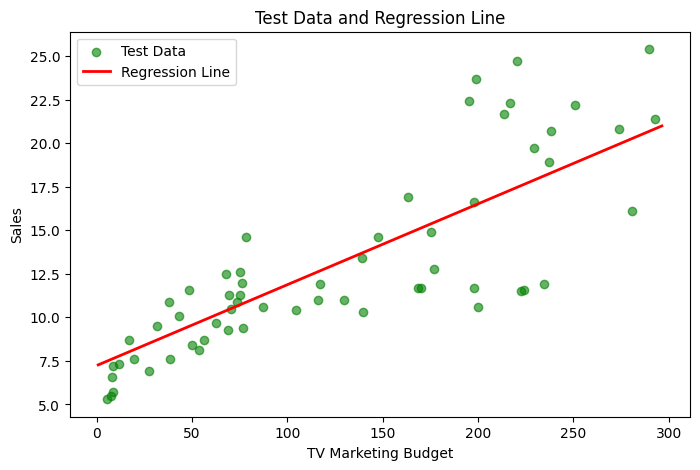

In [50]:
# 15 .plot test data and the model
plt.figure(figsize=(8, 5))
plt.scatter(X_test, Y_test, color='green', alpha=0.6, label="Test Data")
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Test Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [15]:
# 16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("\nModel Evaluation (scikit-learn):")
print("Mean Squared Error (MSE):", mse)
print("R Squared:", r2)



Model Evaluation (scikit-learn):
Mean Squared Error (MSE): 8.970991242413614
R Squared: 0.6714477229302764


In [18]:
# 17.Calculate and print R Squared and Adjusted R Squared values without anylibrary

# Convert test data and predictions to numpy arrays (if not already)
y_test_np = Y_test.values
n = len(y_test_np)
p = 1from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Calculate R Squared manually
ss_total = np.sum((y_test_np - np.mean(y_test_np))**2)
ss_res = np.sum((y_test_np - y_pred)**2)
r_squared_manual = 1 - (ss_res/ss_total)

# Calculate Adjusted R Squared
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)



Manual Evaluation:
Manual R Squared: 0.6714477229302764
Manual Adjusted R Squared: 0.6657830284980398
